In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px


In [3]:
df = pd.read_csv("cleaned_dataset.csv")

### Note on Colors

In this notebook, all visualizations that require custom colors will consistently use the colors defined in the `colors_palette` list.


In [4]:
colors_palette = [
    "#9B7EBD", 
    "#D4BEE4",  
    "#674188",  
    "#A888B5",  
    "#BB9CC0",  
    "#C8ACD6", 
    "#D4BEE4", 
    "#E6CCE6",  
    "#F3E8FF"
]

# Rate Percent by Region

This code creates a bar plot showing the `rate_percent` for each `Region` and annotates each bar with its value for easy visualization.


/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/810818651.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='Region', y='rate_percent', ci=None, palette=colors_palette)
/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/810818651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Region', y='rate_percent', ci=None, palette=colors_palette)
/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/810818651.py:2: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  ax = sns.barplot(data=df, x='Region', y='rate_percent', ci=None, palette=colors_palette)


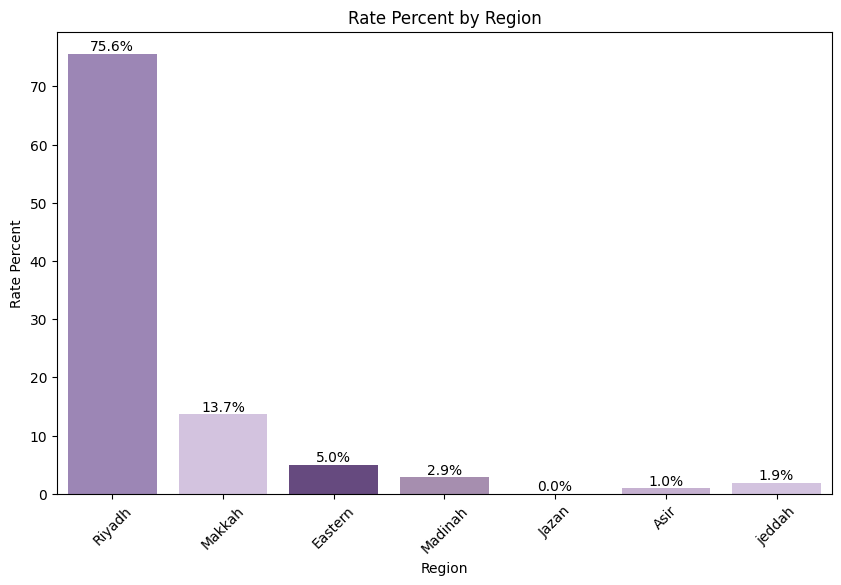

In [5]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df, x='Region', y='rate_percent', ci=None, palette=colors_palette)
plt.title('Rate Percent by Region')
plt.ylabel('Rate Percent')
plt.xlabel('Region')
plt.xticks(rotation=45)

# إضافة القيم فوق الأعمدة
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()


#### Plot shows that Riyadh clearly dominates with over 75% of the share, showing it as the main concentration area.

#### Other regions like Makkah (13.7%) and Eastern (5%) follow distantly, while most remaining regions contribute almost negligibly.


# Rate Percent and Funding by Region

This code creates a bar plot showing the `rate_percent` for each `Region` along with the sum of `Funding_min` in each region, and annotates each bar with its value for easy visualization.


/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/702586153.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=region_stats, x='Region', y='rate_percent', ci=None, palette=colors_palette)
/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/702586153.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=region_stats, x='Region', y='rate_percent', ci=None, palette=colors_palette)
/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/702586153.py:7: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  ax = sns.barplot(data=region_stats, x='Region', y='rate_percent', ci=None, palette=colors_palette)


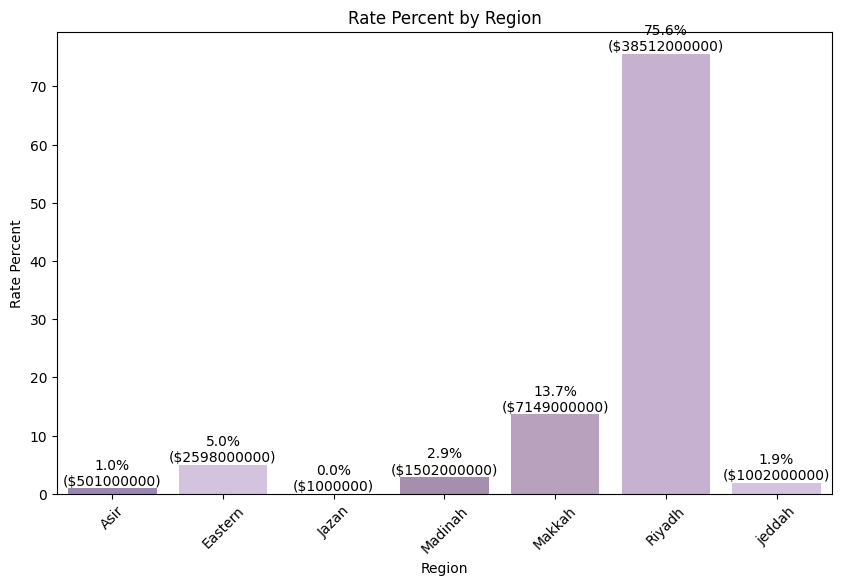

In [6]:
region_stats = df.groupby('Region').agg({
    'rate_percent': 'mean',
    'Funding_min': 'sum'  
}).reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=region_stats, x='Region', y='rate_percent', ci=None, palette=colors_palette)
plt.title('Rate Percent by Region')
plt.ylabel('Rate Percent')
plt.xlabel('Region')
plt.xticks(rotation=45)

# إضافة القيم ومبالغ التمويل فوق الأعمدة
for p, funding in zip(ax.patches, region_stats['Funding_min']):
    height = p.get_height()
    ax.annotate(f'{height:.1f}%\n(${funding:.0f})', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

##### Plot shows that Riyadh leads overwhelmingly with 75.6% ($385B), capturing the majority of funding.
##### Makkah ($71B, 13.7%) and Eastern ($26B, 5%) follow, while other regions attract minimal investment.

# ــــــــــــــــــــــــــــ

# Number of Unique Companies by Year of Establishment

This code filters out companies with missing or zero founding year, removes duplicates, and creates a bar plot showing the number of unique companies for each year of establishment. Each bar is annotated with its count.


/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/1156506372.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/1156506372.py:5: UserWarning: 
The palette list has fewer values (9) than needed (21) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(


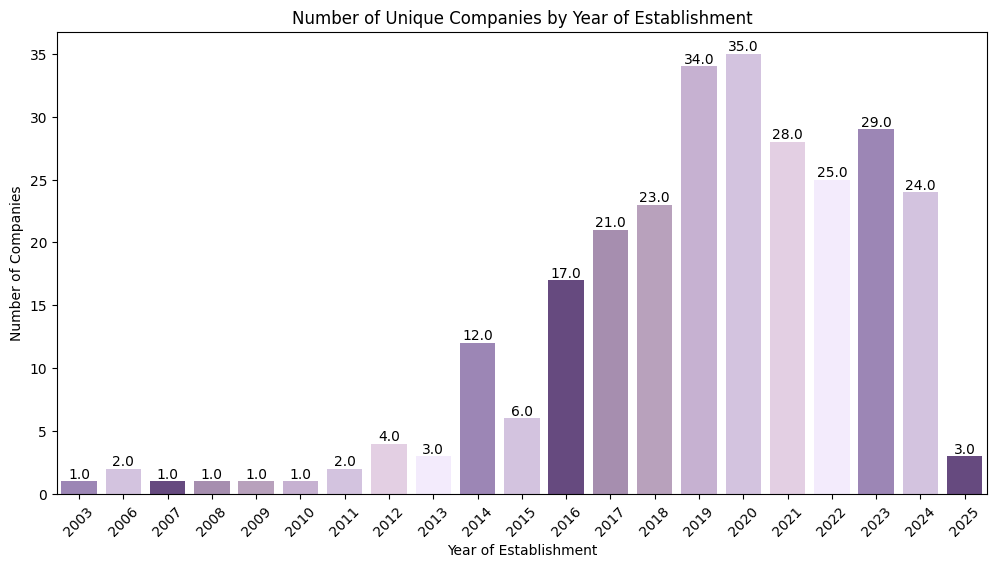

In [7]:
# نستبعد اللي سنتهم 0
df_filtered = df[df['Year of establishment'].notna() & (df['Year of establishment'] != 0)]
df_unique = df_filtered.drop_duplicates(subset=['Name', 'Year of establishment'])
plt.figure(figsize=(12,6))
ax = sns.countplot(
    data=df_unique, 
    x='Year of establishment', 
    palette=colors_palette, 
    order=sorted(df_unique['Year of establishment'].unique())
)
plt.title('Number of Unique Companies by Year of Establishment')
plt.xlabel('Year of Establishment')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
# المعلومات
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

##### The analysis shows a steady rise in the number of new companies over time, with a sharp increase beginning around 2014.
##### Company formations peaked in 2019–2020 (34–35 companies), indicating a boom period, followed by slightly lower but still strong activity through 2021–2023.

# Top 30 Companies Aligned with Vision 2030 by Funding

This code filters companies aligned with Vision 2030, converts their average funding to numeric values, and plots the top 30 companies by `Funding_Avg_num`. The bars are grouped by `Opportunity_Level` and annotated with funding values for clarity.


/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/916128602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_companies['Funding_Avg_num'] = aligned_companies['Funding_Avg'].apply(convert_funding)
/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/916128602.py:15: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  ax = sns.barplot(


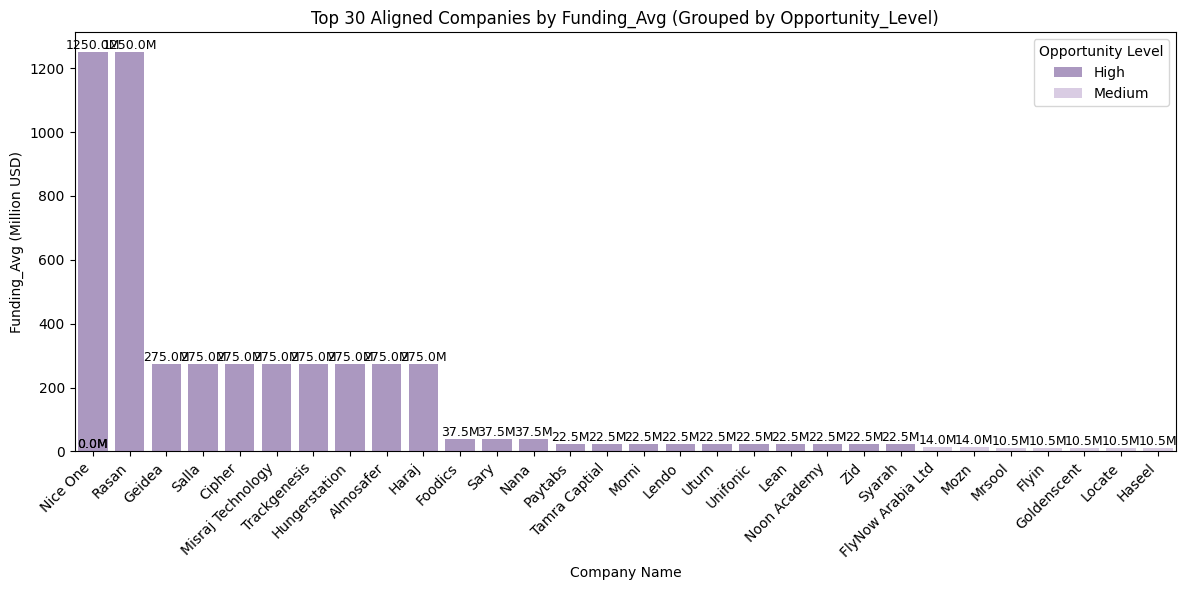

In [8]:
aligned_companies = df[df['Allign with 2030'] == 'Yes']
def convert_funding(f):
    if isinstance(f, str):
        f = f.replace(',', '').strip()
        if 'B' in f:
            return float(f.replace('B','')) * 1000  
        elif 'M' in f:
            return float(f.replace('M',''))
    return f

aligned_companies['Funding_Avg_num'] = aligned_companies['Funding_Avg'].apply(convert_funding)
top_funding = aligned_companies.sort_values('Funding_Avg_num', ascending=False).head(30)

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=top_funding,
    x='Name',
    y='Funding_Avg_num',
    hue='Opportunity_Level',
    dodge=False,
    palette=colors_palette, 
    alpha=0.85
)

plt.title("Top 30 Aligned Companies by Funding_Avg (Grouped by Opportunity_Level)")
plt.xlabel("Company Name")
plt.ylabel("Funding_Avg (Million USD)")
plt.xticks(rotation=45, ha='right')

#نضيف القيم والمعلومات
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}M',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.legend(title='Opportunity Level', loc='upper right')
plt.tight_layout()
plt.show()


##### The analysis shows that funding distribution is highly concentrated, with Nice One  and Rasan far ahead of other players.
##### Most remaining companies secured moderate to low funding levels ($10M–$275M), reflecting a market dominated by a few large-scale investments.

# Sample (Random) Companies by Funding and Opportunity Level

This code selects companies aligned with Vision 2030, converts their average funding to numeric values, and then samples the top 5 companies from each `Opportunity_Level` (High, Medium, Low). It creates a bar plot showing `Funding_Avg_num` for these sampled companies, with bars colored by opportunity level and annotated with funding values.


/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/2718564300.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_companies['Funding_Avg_num'] = aligned_companies['Funding_Avg'].apply(convert_funding)
/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/2718564300.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values('Funding_Avg_num', ascending=False).head(5))
/var/folders/05/pmbhx6794zlb2hyyvy0v5

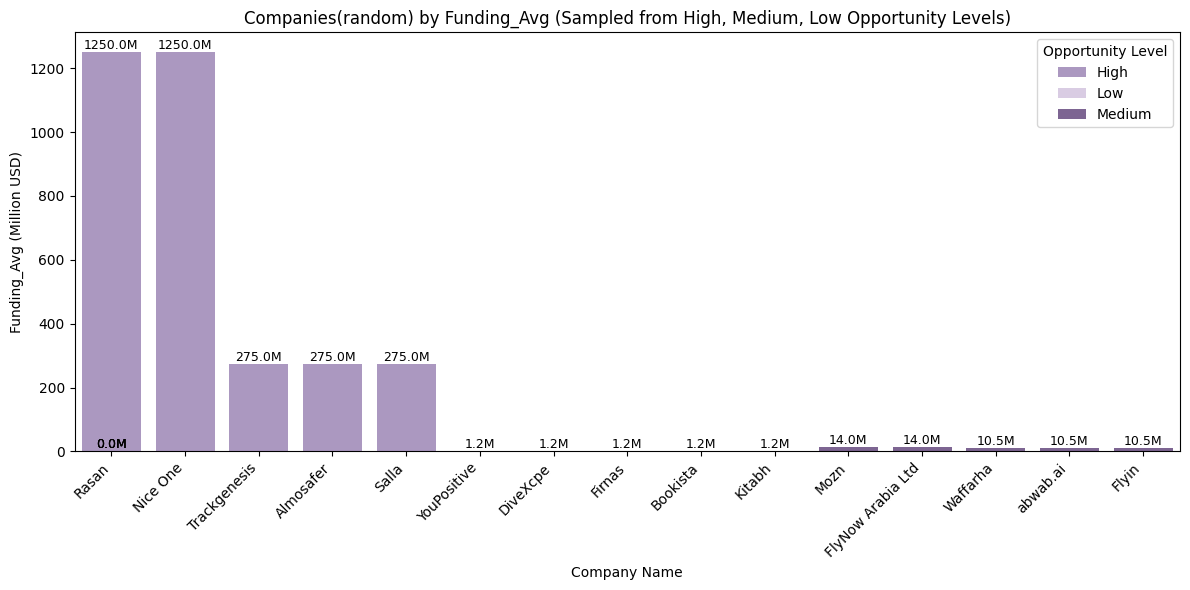

In [9]:
aligned_companies = df[df['Allign with 2030'] == 'Yes']
def convert_funding(f):
    if isinstance(f, str):
        f = f.replace(',', '').strip()
        if 'B' in f:
            return float(f.replace('B','')) * 1000  
        elif 'M' in f:
            return float(f.replace('M',''))
    return f

aligned_companies['Funding_Avg_num'] = aligned_companies['Funding_Avg'].apply(convert_funding)
top_funding = aligned_companies.groupby('Opportunity_Level', group_keys=False)\
                               .apply(lambda x: x.sort_values('Funding_Avg_num', ascending=False).head(5))

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=top_funding,
    x='Name',
    y='Funding_Avg_num',
    hue='Opportunity_Level',
    dodge=False,
    palette=colors_palette,
    alpha=0.85
)
plt.title("Companies(random) by Funding_Avg (Sampled from High, Medium, Low Opportunity Levels)")
plt.xlabel("Company Name")
plt.ylabel("Funding_Avg (Million USD)")
plt.xticks(rotation=45, ha='right')
# نضيف القيم
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}M',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.legend(title='Opportunity Level', loc='upper right')
plt.tight_layout()
plt.show()


##### Plot shows that Rasan and Nice One dominate with $1.25B each, standing far above the rest.
##### Other companies like Salla, Cipher, and Misraj Technology follow at ~$275M, while most players remain at significantly lower levels ($1M–$14M), highlighting a highly concentrated funding landscape.

### Companies with Multiple Tags

This code filters companies having more than one tag, selects the top 40 based on `NumOfTags`, and creates a bar plot showing the number of tags for each company.


/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/391859794.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_multi_tags, x='Name', y='NumOfTags', palette=colors_palette)
/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/391859794.py:5: UserWarning: 
The palette list has fewer values (9) than needed (40) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_multi_tags, x='Name', y='NumOfTags', palette=colors_palette)


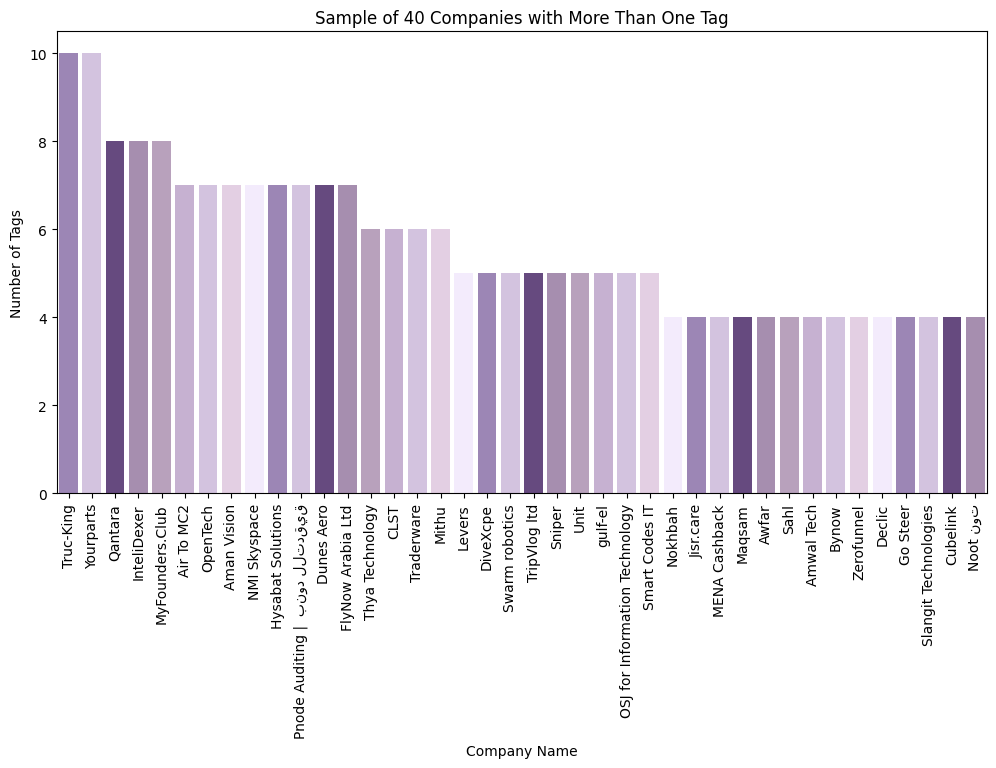

In [10]:
multi_tags = df[df['NumOfTags'] > 1]
top_multi_tags = multi_tags.sort_values('NumOfTags', ascending=False).head(40)
#------------------
plt.figure(figsize=(12,6))
sns.barplot(data=top_multi_tags, x='Name', y='NumOfTags', palette=colors_palette)
plt.title('Sample of 40 Companies with More Than One Tag')
plt.xlabel('Company Name')
plt.ylabel('Number of Tags')
plt.xticks(rotation=90)
plt.show()

##### The analysis shows that some companies stand out with broader diversification, such as Yourparts and TrukKing (10 tags each), indicating wide market reach or multi-sector activity.
##### Most other companies fall in the 4–8 tag range, reflecting moderate diversification, while only a few maintain very high tag counts.

# Companies Established 2023-2025

This code filters companies founded between 2023 and 2025, selects a sample of 30 for 2023-2024 while including all 2025 companies, and creates a scatter plot showing each company's year of establishment. Points are colored based on whether the company aligns with Vision 2030.


/var/folders/05/pmbhx6794zlb2hyyvy0v5srr0000gn/T/ipykernel_56313/212027093.py:15: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.scatterplot(data=companies_final,


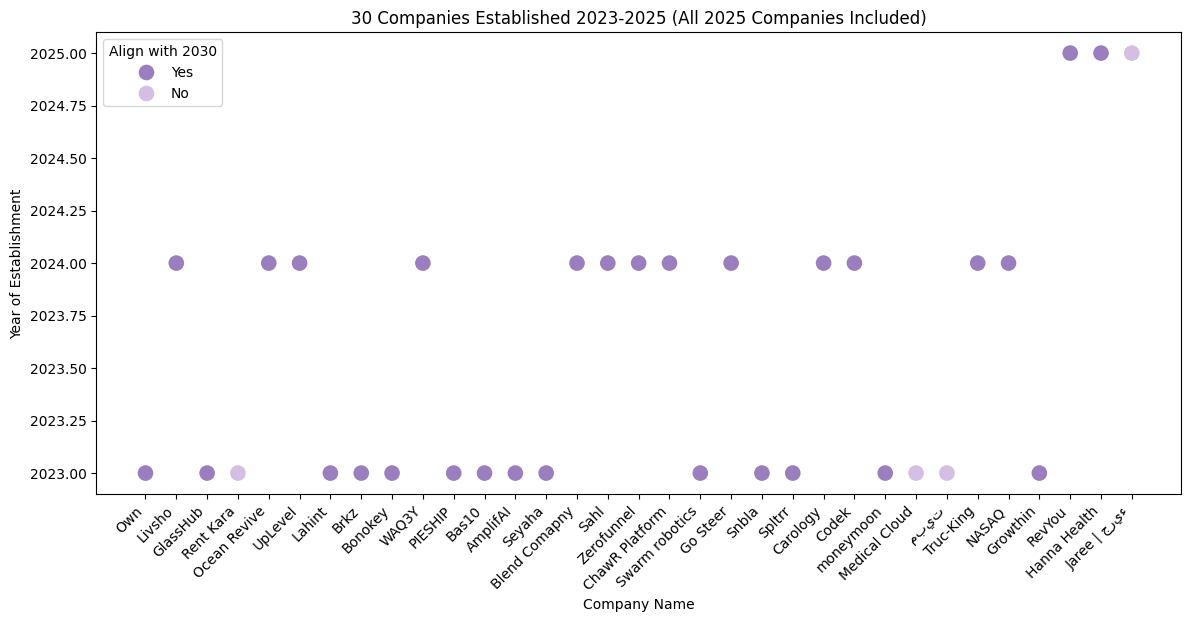

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# فلتر للشركات اللي نبي السنوات يعني
companies_2023_2025 = df[(df['Year of establishment'] >= 2023) & 
                         (df['Year of establishment'] <= 2025)]

# نحذف التكرار بحيث كل شركة تظهر مرة واحدة
companies_2023_2024 = companies_2023_2025[companies_2023_2025['Year of establishment'] < 2025].head(30)
# نبي ٢٠٢٥ تظهر كل شركاته
companies_2025 = companies_2023_2025[companies_2023_2025['Year of establishment'] == 2025]
companies_final = pd.concat([companies_2023_2024, companies_2025])

plt.figure(figsize=(14,6))
sns.scatterplot(data=companies_final,
                x='Name',
                y='Year of establishment',
                hue='Allign with 2030',
                s=150,
                palette=colors_palette)

plt.title("30 Companies Established 2023-2025 (All 2025 Companies Included)")
plt.xlabel("Company Name")
plt.ylabel("Year of Establishment")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Align with 2030")
plt.show()


##### Plot shows that new company establishments between 2023–2025 are active and continuous, with a balanced spread across the years.
##### Most of these companies are marked as aligned with Vision 2030, reflecting strong alignment of recent startups with national strategic goals.

# Alignment of Companies with Vision 2030

This code counts the companies based on the `Allign with 2030` column, calculates their percentages, and creates a pie chart showing


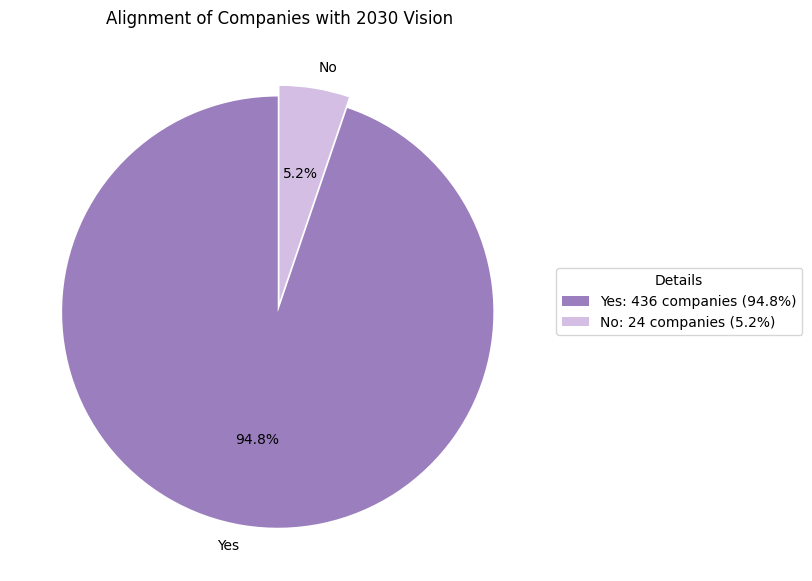

In [12]:
# عد الشركات حسب العمود Allign with 2030
alignment_counts = df['Allign with 2030'].value_counts()
alignment_percent = df['Allign with 2030'].value_counts(normalize=True) * 100

labels_box = [f"{idx}: {alignment_counts[idx]} companies ({alignment_percent[idx]:.1f}%)" 
              for idx in alignment_counts.index]

# نرسم البلوت حقنا
plt.figure(figsize=(7,7))
colors =colors_palette  
plt.pie(alignment_counts,
        labels=alignment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=(0.05,0))  

plt.title("Alignment of Companies with 2030 Vision")
# علشان نحط المعلومات
plt.gca().legend(labels_box, title="Details", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


##### The analysis shows that an overwhelming majority of companies (94.8% / 436 companies) are aligned with Vision 2030, while only 5.2% (24 companies) are not.
##### This reflects a strong national trend of startups and businesses shaping their strategies in line with Saudi Arabia’s Vision 2030 objectives.

# Companies with and without Year of Establishment

This code separates companies with a valid founding year from those with year = 0, removes duplicates, calculates counts and percentages, and creates a pie chart showing the proportion of companies with and without a valid year of establishment. A detailed legend is included for clarity.


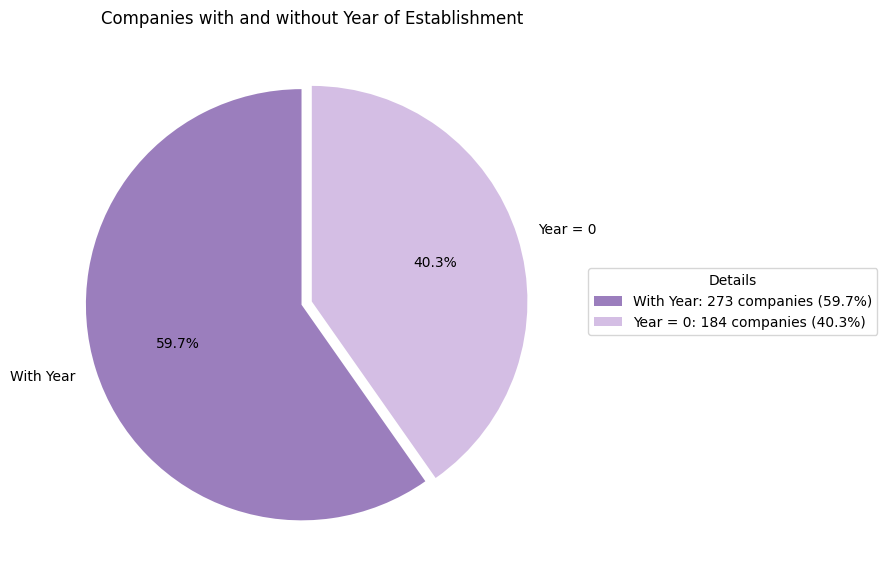

In [13]:
df_with_year = df[df['Year of establishment'].notna() & (df['Year of establishment'] != 0)]
df_with_year_unique = df_with_year.drop_duplicates(subset=['Name', 'Year of establishment'])

df_zero_year = df[df['Year of establishment'] == 0]
df_zero_year_unique = df_zero_year.drop_duplicates(subset=['Name'])

counts = [len(df_with_year_unique), len(df_zero_year_unique)]
labels = ['With Year', 'Year = 0']

percent = [c/sum(counts)*100 for c in counts]

labels_box = [f"{labels[i]}: {counts[i]} companies ({percent[i]:.1f}%)" for i in range(len(labels))]
plt.figure(figsize=(7,7))
colors =colors_palette
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05,0))
plt.title("Companies with and without Year of Establishment")
plt.gca().legend(labels_box, title="Details", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

##### Plot shows that 59.7% of companies (273) have a recorded year of establishment, while 40.3% (184) lack this information.
##### This gap highlights a significant portion of companies with missing historical data, which may affect trend analysis and ecosystem maturity insights.

# Distribution of Opportunity Levels

Opportunity_Level
Medium    336
Low        98
High       26
Name: count, dtype: int64


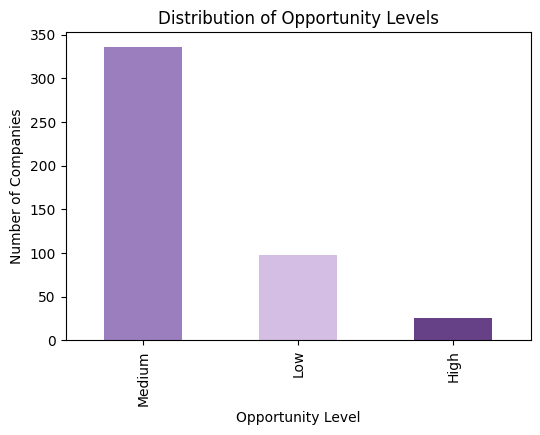

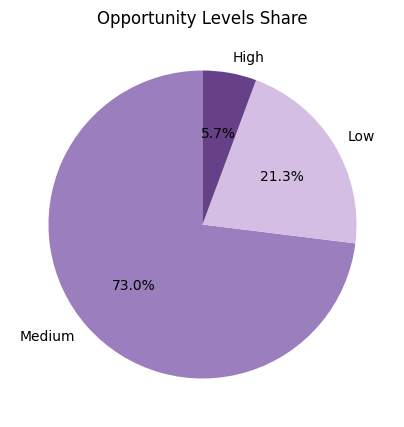

In [14]:
# Count how many companies fall in each opportunity level
level_counts = df["Opportunity_Level"].value_counts()

print(level_counts)

# Bar chart
plt.figure(figsize=(6,4))
level_counts.plot(kind="bar", color=colors_palette)
plt.title("Distribution of Opportunity Levels")
plt.xlabel("Opportunity Level")
plt.ylabel("Number of Companies")
plt.show()

# Pie chart 
plt.figure(figsize=(5,5))
level_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=colors_palette)
plt.title("Opportunity Levels Share")
plt.ylabel("")  
plt.show()


##### The bar chart shows that most companies are in the Medium opportunity level, while Low is less common and High is very rare.

##### The pie chart highlights the share, confirming that Medium dominates with ~73%, Low has ~21%, and High only ~6%.

##### The overall analysis indicates that most companies fall into the Medium opportunity level, suggesting that the startup ecosystem is growing steadily but still has limited cases of very high funding, which highlights the need for stronger investment pipelines to support more companies reaching the high level.

# Relationship between Funding_Avg and Opportunity Level

<Figure size 700x500 with 0 Axes>

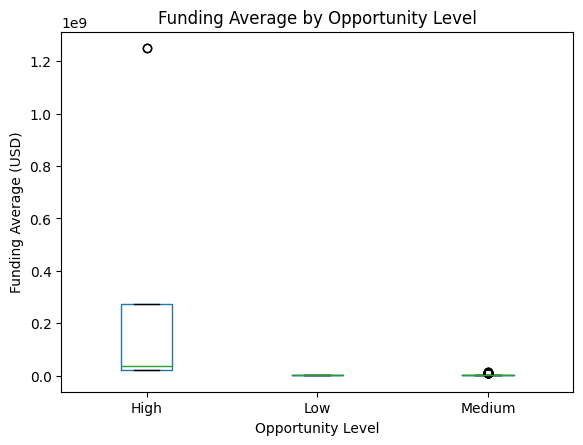

In [15]:
# Simple converter (M/B/K back to numbers)
def text_to_number(x):
    if "B" in x: return float(x.replace("B","")) * 1e9
    if "M" in x: return float(x.replace("M","")) * 1e6
    if "K" in x: return float(x.replace("K","")) * 1e3
    return float(x)

df["Funding_Avg_Num"] = df["Funding_Avg"].apply(text_to_number)

# Boxplot: Funding distribution per level
plt.figure(figsize=(7,5))
df.boxplot(column="Funding_Avg_Num", by="Opportunity_Level", grid=False)
plt.title("Funding Average by Opportunity Level")
plt.suptitle("")
plt.xlabel("Opportunity Level")
plt.ylabel("Funding Average (USD)")
plt.show()


##### The distribution shows that startups classified as High Opportunity Level receive dramatically larger funding compared to Low and Medium, with some extreme outliers above one billion USD.
##### In contrast, the Low and Medium groups appear more stable and consistent, but their funding ranges are much smaller, highlighting a strong imbalance in how investments are allocated.

##### This study highlights a significant funding gap, where only a few high-level startups capture extremely large investments, while the majority remain within much smaller and more stable funding ranges.

# Outliers Company

In [16]:
# 1) Ensure numeric column from Funding_Avg text like "1.25M"
if "Funding_Avg_Num" not in df.columns:
    df["Funding_Avg_Num"] = (
        df["Funding_Avg"]
        .astype(str)
        .str.replace(",", "", regex=False)
        .str.replace("K", "e3", regex=False)
        .str.replace("M", "e6", regex=False)
        .str.replace("B", "e9", regex=False)
        .apply(pd.to_numeric, errors="coerce")
    )

# 2) IQR outlier detection
Q1 = df["Funding_Avg_Num"].quantile(0.25)
Q3 = df["Funding_Avg_Num"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[df["Funding_Avg_Num"] > (Q3 + 1.5 * IQR)].copy()

# 3) Show available columns (pick only those that exist)
want = [
    "Company", "Startup", "Name",           # any name column you might have
    "Funding (USD)", "Funding_Avg", "Funding_Avg_Num",
    "Opportunity_Level", "Field", "Sector",
    "Tags", "Allign with 2030"
]
cols = [c for c in want if c in outliers.columns]

# 4) Sort and display
outliers = outliers.sort_values("Funding_Avg_Num", ascending=False)
print(outliers[cols].head(20))
print(f"\nFound {len(outliers)} outlier companies (>{(Q3 + 1.5*IQR):,.0f} USD).")



                  Name Funding (USD) Funding_Avg  Funding_Avg_Num  \
16               Rasan    500M – 2B+       1.25B     1.250000e+09   
17            Nice One    500M – 2B+       1.25B     1.250000e+09   
77           Almosafer   50M – 500M+     275.00M     2.750000e+08   
2                Salla   50M – 500M+     275.00M     2.750000e+08   
374       Trackgenesis   50M – 500M+     275.00M     2.750000e+08   
372               Marn   50M – 500M+     275.00M     2.750000e+08   
362  Misraj Technology   50M – 500M+     275.00M     2.750000e+08   
138             Cipher   50M – 500M+     275.00M     2.750000e+08   
99       Hungerstation   50M – 500M+     275.00M     2.750000e+08   
96               Haraj   50M – 500M+     275.00M     2.750000e+08   
93              Geidea   50M – 500M+     275.00M     2.750000e+08   
3                 Nana     25M – 50M      37.50M     3.750000e+07   
9                 Sary     25M – 50M      37.50M     3.750000e+07   
1              Foodics     25M – 5

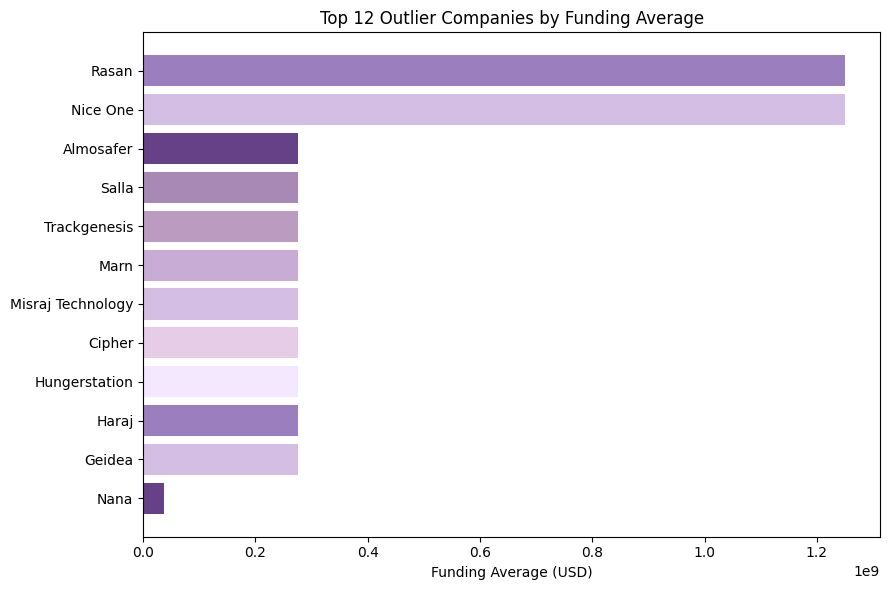

In [17]:
#  Ensure numeric column from Funding_Avg text like "1.25M" 
if "Funding_Avg_Num" not in df.columns:
    df["Funding_Avg_Num"] = (
        df["Funding_Avg"].astype(str)
        .str.replace(",", "", regex=False)
        .str.replace("K", "e3", regex=False)
        .str.replace("M", "e6", regex=False)
        .str.replace("B", "e9", regex=False)
        .apply(pd.to_numeric, errors="coerce")
    )

# IQR outliers 
Q1 = df["Funding_Avg_Num"].quantile(0.25)
Q3 = df["Funding_Avg_Num"].quantile(0.75)
IQR = Q3 - Q1
thresh = Q3 + 1.5 * IQR
outliers = df[df["Funding_Avg_Num"] > thresh].copy()

#  Pick a name column that exists (fallback to index) 
name_candidates = ["Company","Startup","Name","Company Name","Company_Name","Org","Organization"]
name_col = next((c for c in name_candidates if c in outliers.columns), None)
outliers["_Label"] = (
    outliers[name_col].astype(str).str.strip() if name_col
    else outliers.index.astype(str)
)

#  basic cleaning & de-dup
outliers = outliers[outliers["_Label"].ne("")].drop_duplicates(subset="_Label")

#  Sort and keep Top N for readability 
TOP_N = 12
ranked = outliers.sort_values("Funding_Avg_Num", ascending=False).head(TOP_N)

#  Color by Opportunity_Level (fallback gray) 
palette = {"High":"#2ca02c","Medium":"#ff7f0e","Low":"#1f77b4"}
colors = ranked["Opportunity_Level"].map(palette).fillna("#888888")

#  Plot 
plt.figure(figsize=(9,6))
plt.barh(ranked["_Label"], ranked["Funding_Avg_Num"], color=colors_palette[:len(ranked)])
plt.xlabel("Funding Average (USD)")
plt.title(f"Top {len(ranked)} Outlier Companies by Funding Average")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### The analysis shows that Nice One and Rasan dominate as clear outliers, each surpassing $1.2B in funding, far above the rest.
##### Other notable companies like Salla, Cipher, Haraj, Hungerstation, and Almosafe fall within the mid-range (~$250M–$300M), while the majority hold significantly lower funding levels, confirming a highly skewed investment landscape.

Total number of Outliers: 56
Number of Outliers aligned with Vision 2030: 51
                _Label Funding_Avg  Funding_Avg_Num Opportunity_Level  \
16               Rasan       1.25B     1.250000e+09              High   
17            Nice One       1.25B     1.250000e+09              High   
99       Hungerstation     275.00M     2.750000e+08              High   
2                Salla     275.00M     2.750000e+08              High   
374       Trackgenesis     275.00M     2.750000e+08              High   
362  Misraj Technology     275.00M     2.750000e+08              High   
138             Cipher     275.00M     2.750000e+08              High   
96               Haraj     275.00M     2.750000e+08              High   
93              Geidea     275.00M     2.750000e+08              High   
77           Almosafer     275.00M     2.750000e+08              High   
3                 Nana      37.50M     3.750000e+07              High   
1              Foodics      37.50M     3.750000

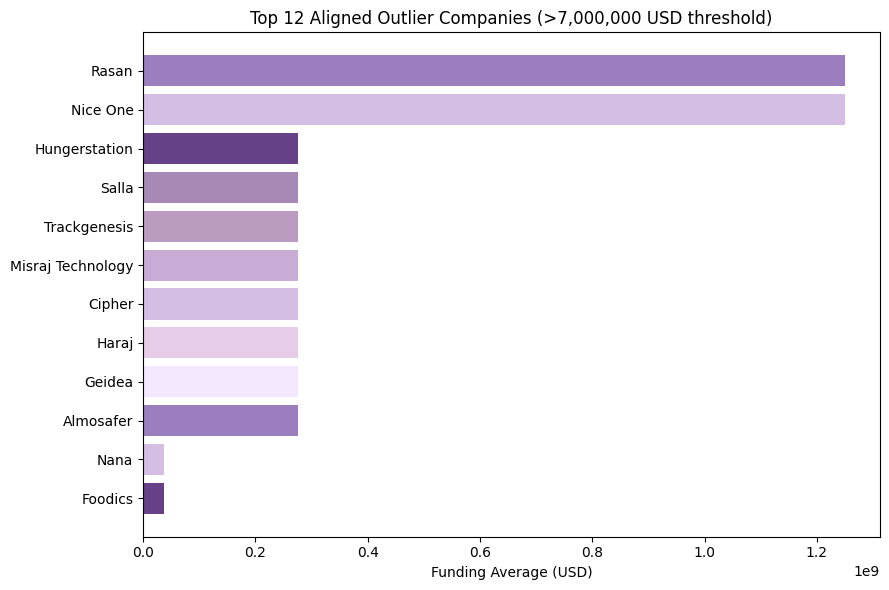

In [18]:
AL_COL = "Allign with 2030"   # keep your exact column name

# 1) Ensure numeric column from Funding_Avg like "1.25M"
if "Funding_Avg_Num" not in df.columns:
    df["Funding_Avg_Num"] = (
        df["Funding_Avg"].astype(str)
        .str.replace(",", "", regex=False)
        .str.replace("K", "e3", regex=False)
        .str.replace("M", "e6", regex=False)
        .str.replace("B", "e9", regex=False)
        .apply(pd.to_numeric, errors="coerce")
    )

# 2) Detect outliers using IQR
Q1 = df["Funding_Avg_Num"].quantile(0.25)
Q3 = df["Funding_Avg_Num"].quantile(0.75)
IQR = Q3 - Q1
THRESH = Q3 + 1.5 * IQR
outliers = df[df["Funding_Avg_Num"] > THRESH].copy()

# 3) Normalize alignment to Yes/No
outliers[AL_COL] = (
    outliers[AL_COL].astype(str).str.strip().str.lower().map({"yes":"Yes","no":"No"})
)

# 4) Pick a company/name column if available; else fall back to index
name_candidates = ["Company","Startup","Name","Company Name","Company_Name","Org","Organization"]
name_col = next((c for c in name_candidates if c in outliers.columns), None)
outliers["_Label"] = (
    outliers[name_col].astype(str).str.strip() if name_col else outliers.index.astype(str)
)
outliers = outliers[outliers["_Label"].ne("")]

# 5) Keep only outliers aligned with Vision 2030
aligned_outliers = outliers[outliers[AL_COL] == "Yes"].copy()

# 6) Print results (robust: only print columns that exist)
want = ["_Label","Funding_Avg","Funding_Avg_Num","Opportunity_Level",AL_COL,"Field","Sector","Tags"]
cols = [c for c in want if c in aligned_outliers.columns]

print(f"Total number of Outliers: {len(outliers)}")
print(f"Number of Outliers aligned with Vision 2030: {len(aligned_outliers)}")
print(aligned_outliers[cols].sort_values("Funding_Avg_Num", ascending=False).head(20))

# 7) Plot top-N aligned outliers (sorted)
TOP_N = 12
ranked = aligned_outliers.sort_values("Funding_Avg_Num", ascending=False).head(TOP_N)
plt.figure(figsize=(9,6))
plt.barh(ranked["_Label"], ranked["Funding_Avg_Num"], color=colors_palette[:len(ranked)])
plt.xlabel("Funding Average (USD)")
plt.title(f"Top {len(ranked)} Aligned Outlier Companies (>{THRESH:,.0f} USD threshold)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



##### The analysis indicates that companies with exceptionally high funding averages are already on a strong trajectory. Meanwhile, startups with lower average funding, even though they are aligned with Vision 2030, need to intensify their efforts and adopt more aggressive strategies to unlock higher investment potential and catch up with the leaders.

# Companies with and without Year of Establishment

In [19]:
tag_counts = df["Tags"].value_counts()
tag_counts = (
    df["Tags"]
    .str.split(",")          
    .explode()                
    .str.strip()               
    .value_counts()
)

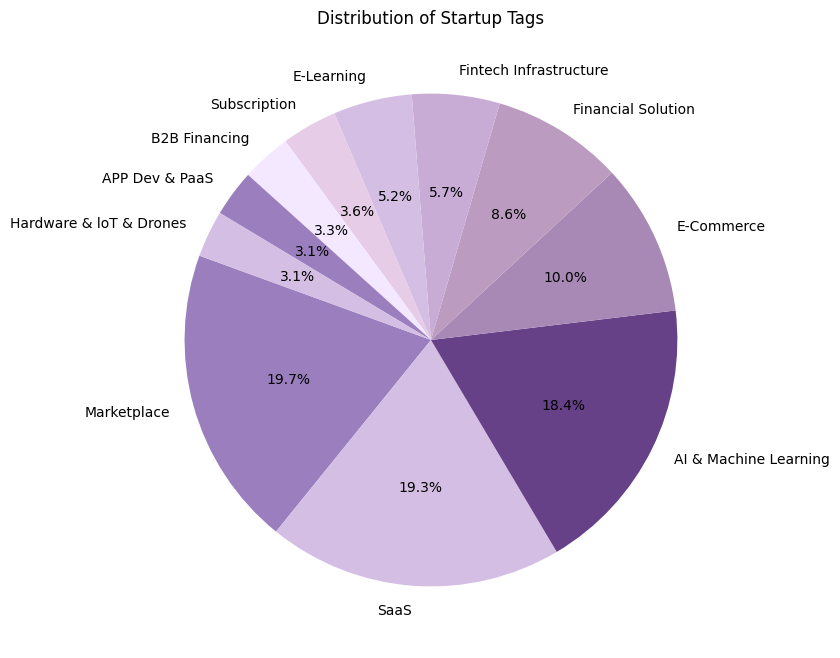

In [20]:
tag_percent = (tag_counts / tag_counts.sum()) * 100
filtered = tag_percent[tag_percent >= 1.5]
plt.figure(figsize=(8,8))
plt.pie(
    filtered.values,
    labels=filtered.index,
    autopct="%1.1f%%",  
    startangle=160,
    colors = colors_palette
)
plt.title("Distribution of Startup Tags")
plt.show()

#### By looking at the pie chart, we can see that most companies are concentrated in three main industries: SaaS, AI & Machine Learning, and Marketplace. Together, these sectors account for nearly 60% of the total dataset, highlighting their dominance. The remaining 40% is distributed across a wide range of other industries, each with a smaller share.

In [21]:
stage_counts = df["Stage"].value_counts()
stage_percent = (stage_counts / stage_counts.sum()) * 100
stage_funding = df.groupby("Stage")["Funding_min"].sum().reindex(stage_counts.index)

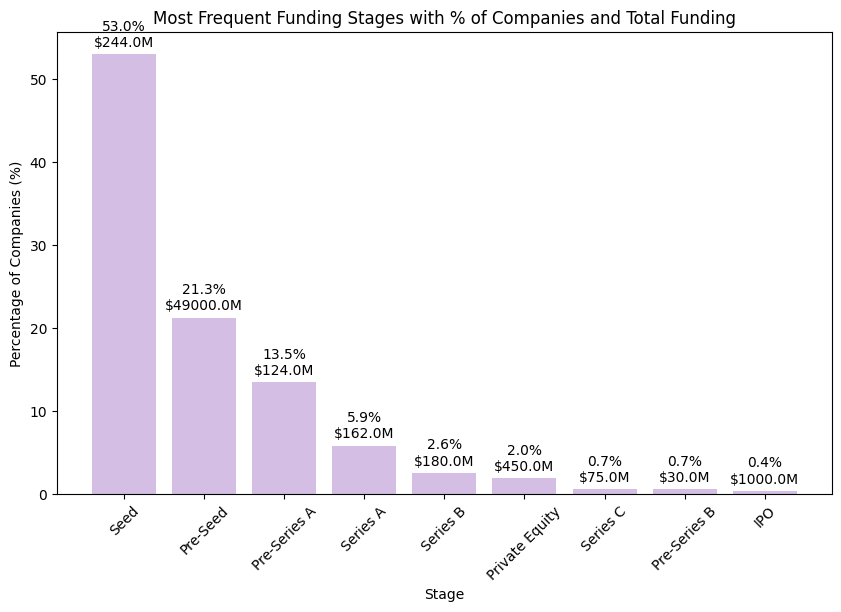

In [22]:
fig, ax = plt.subplots(figsize=(10,6))

bars = ax.bar(stage_counts.index, stage_percent, color="#D4BEE4")

for i, (pct, fund) in enumerate(zip(stage_percent, stage_funding)):
    ax.text(i, pct + 0.5, 
            f"{pct:.1f}%\n${fund/1_000_000:.1f}M", 
            ha="center", va="bottom", fontsize=10)

ax.set_title("Most Frequent Funding Stages with % of Companies and Total Funding")
ax.set_ylabel("Percentage of Companies (%)")
ax.set_xlabel("Stage")
plt.xticks(rotation=45)
plt.show()

#### By looking at the bar charts, we can clearly see that over 50% of the companies are in the Seed stage. This indicates that most of them are still in the initial phase of fundraising, where entrepreneurs seek capital to further develop their product and business model. It also suggests that these companies are relatively early-stage ventures, still building traction and not yet operating at a large scale.

In [23]:
valid_industries = df["Industry"].value_counts()
valid_industries = valid_industries[valid_industries > 10].index
filtered = df[df["Industry"].isin(valid_industries)].copy()

filtered["__size__"] = 1  

custom_colors = ["#E6E6FA"]

fig = px.treemap(
    filtered,
    path=[px.Constant("All Industries"), "Industry", "Name"],
    values="__size__",
    color="Industry",                        
    color_discrete_sequence=px.colors.sequential.Purples   
)
fig.update_traces(root_color="lavender")
fig.update_layout(width=900, height=800)
fig.show()

#### With this treemap, you can clearly see each company and the industry it belongs to, making it easy to visualize how companies are distributed across different sectors.